In [67]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import MultipleLocator

In [24]:
data_rd = pd.read_csv("0.6.csv")
data_rd.describe()
data_rd

,Experiment,Measurement,Replication,Module,Name,Value
0,General,NaN,#0,fcnetwork.node1,#status,15
1,General,NaN,#0,fcnetwork.node2,#status,15
2,General,NaN,#0,fcnetwork.node3,#status,15
3,General,NaN,#0,fcnetwork.node4,#status,15
4,General,NaN,#1,fcnetwork.node1,#status,15
...,...,...,...,...,...,...
395,General,NaN,#98,fcnetwork.node1,#status,15
396,General,NaN,#99,fcnetwork.node4,#status,15
397,General,NaN,#99,fcnetwork.node3,#status,15
398,General,NaN,#99,fcnetwork.node2,#status,15


In [88]:
msgloss = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [89]:
def second_min(lt):
    d={}         
    for i, v in enumerate(lt):
        d[v]=i   
    lt.sort()    
    y=lt[1]      
    return lt[d[y]]  

In [90]:
def crashExist(name):
    data_rd = pd.read_csv(name)
    dataset = np.array(data_rd)
    value = dataset[:,-1]
    i = 0
    count = 0#node crash count
    sys_count = 0# system crash count
    minval = []
    sec_minval = []
    while i < np.shape(value)[0]:
        four_nodes = [value[i],value[i+1],value[i+2] ,value[i+3]]
        val = min(four_nodes)
        val2 = second_min(four_nodes)
        minval.append(val)
        sec_minval.append(val2)
        if val<15:
            count+=1
            if val2<15:
                sys_count+=1
        i = i + 4
    return count,sys_count,minval,sec_minval    
    

In [91]:
count, sys_count, minval, sec_minval= crashExist("0.6.csv")

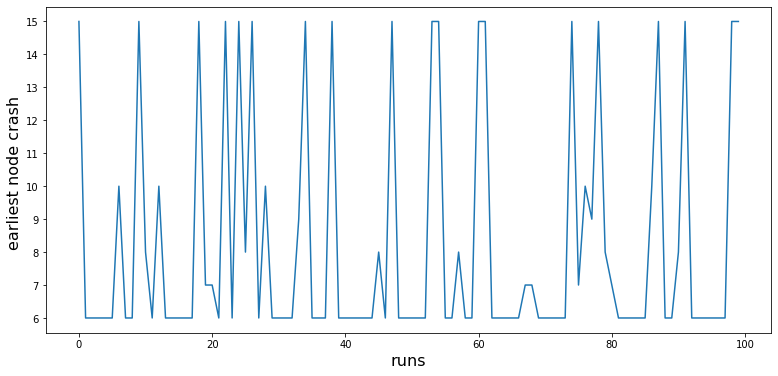

In [93]:
major_locator=MultipleLocator(1)
plt.figure(figsize = (13, 6))
ax=plt.gca()
ax.yaxis.set_major_locator(major_locator)
plt.xlabel('runs', fontsize = 16)
plt.ylabel('earliest node crash ', fontsize = 16)
plt.plot(minval)
plt.show()

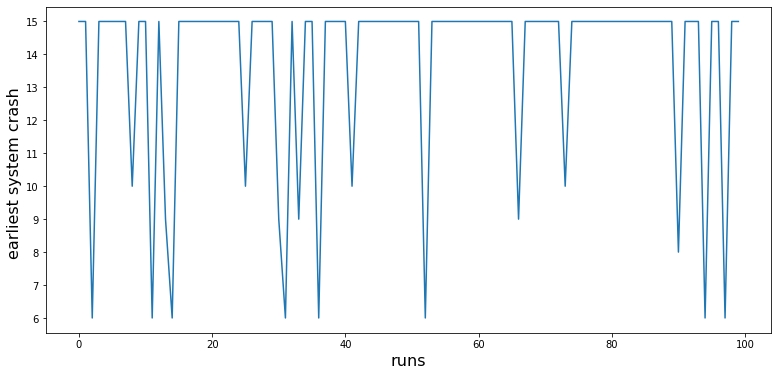

In [94]:
plt.figure(figsize = (13, 6))
ax=plt.gca()
ax.yaxis.set_major_locator(major_locator)
plt.xlabel('runs', fontsize = 16)
plt.ylabel('earliest system crash ', fontsize = 16)
plt.plot(sec_minval)

In [52]:
node_crash_rate = count/100
node_crash_rate

0.81

In [53]:
sys_crash_rate = sys_count/100
sys_crash_rate

0.17

In [64]:
node_crash_rate = []
sys_crash_rate = []
crash_node = []
crash_sys = []

filelist = ["0.1.csv","0.2.csv","0.3.csv","0.4.csv","0.5.csv","0.6.csv","0.7.csv","0.8.csv","0.9.csv"]

for i in range(len(filelist)):
    count,sys_count, minval,sec_minval= crashExist(filelist[i])
    node_crash_rate.append(count/100)
    sys_crash_rate.append(sys_count/100)
    crash_node.append(np.mean(minval))
    crash_sys.append(np.mean(sec_minval))

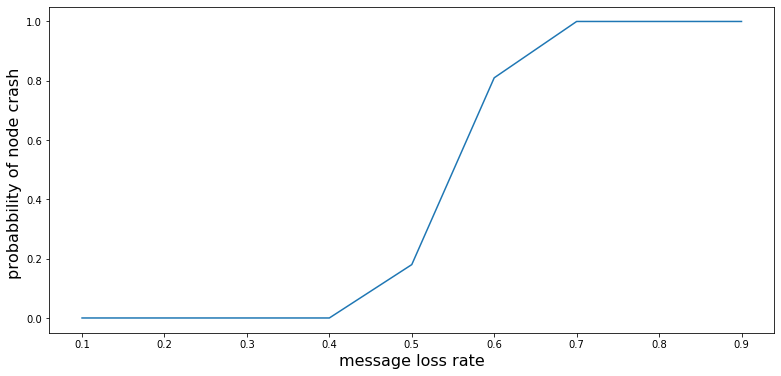

In [97]:
plt.figure(figsize = (13, 6))
plt.xlabel('message loss rate', fontsize = 16)
plt.ylabel('probabbility of node crash ', fontsize = 16)
plt.plot(msgloss,node_crash_rate)

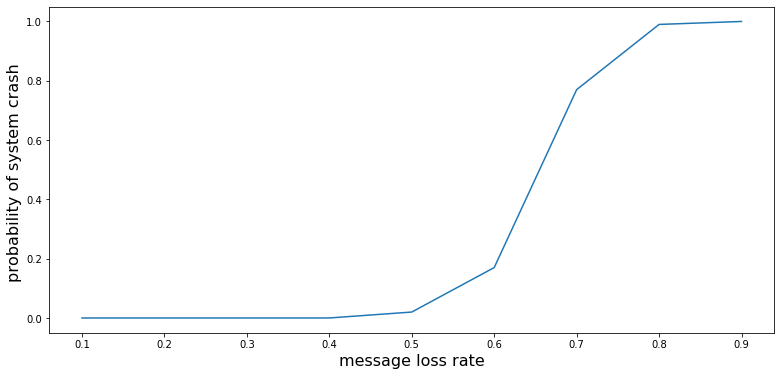

In [98]:
plt.figure(figsize = (13, 6))
plt.xlabel('message loss rate', fontsize = 16)
plt.ylabel('probability of system crash ', fontsize = 16)
plt.plot(msgloss,sys_crash_rate)

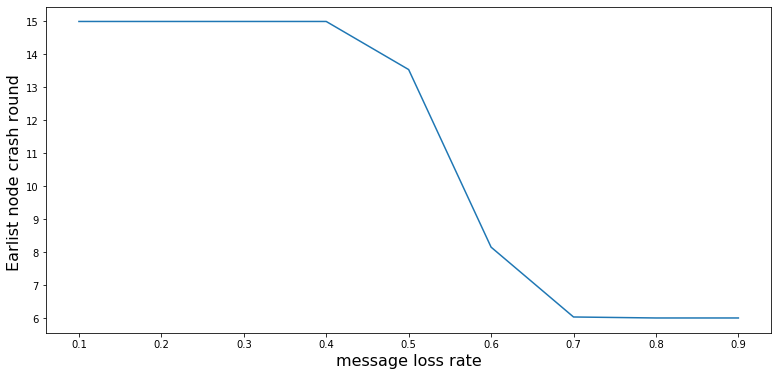

In [95]:
plt.figure(figsize = (13, 6))
ax=plt.gca()
ax.yaxis.set_major_locator(major_locator)
plt.xlabel('message loss rate', fontsize = 16)
plt.ylabel('Earlist node crash round ', fontsize = 16)
plt.plot(msgloss,crash_node)

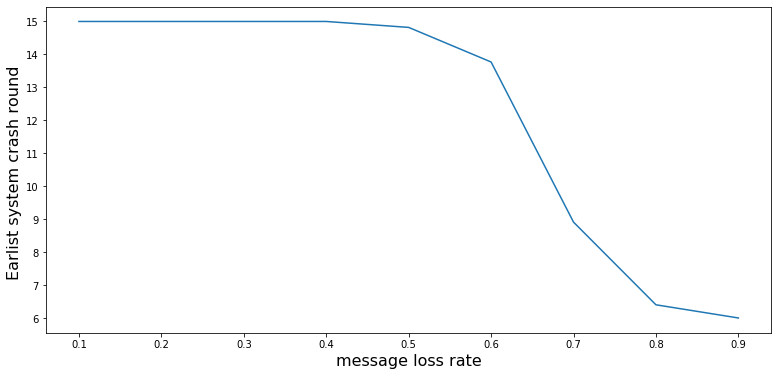

In [96]:
plt.figure(figsize = (13, 6))
ax=plt.gca()
ax.yaxis.set_major_locator(major_locator)
plt.xlabel('message loss rate', fontsize = 16)
plt.ylabel('Earlist system crash round ', fontsize = 16)
plt.plot(msgloss,crash_sys)